<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Univariate-Linear-Regression---Excersises" data-toc-modified-id="Univariate-Linear-Regression---Excersises-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Univariate Linear Regression - Excersises</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Task 2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Task 3</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-1.0.3.1"><span class="toc-item-num">1.0.3.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Task 3</a></span></li></ul></li></ul></li></ul></div>

In this Notebook you will work with a [Boston housing dataset](!https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In this notebook we are going to build models to predict house prices (MEDV).


# Univariate Linear Regression - Excersises

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Task 1

Read the data from file **boston.csv** and check its main properties. 

**Hint:**
You may want to use the following methods:

- your_table_name.head() - prints out the first 5 lines of the table. This function is practical to get a basic idea of the data structure and potentially see some problems (e.g. missing values, wrong formats). 

- your_table_name.shape - prints out dimentions of the data (number of rows, number of columns)

- your_table_name.info() - general information about the variables, e.g. format, number of non-empty values

In [2]:
# read the data from boston.csv

boston_data = pd.read_csv('boston.csv') # your code here (replace _ with your code)

In [3]:
boston_data.head()# check the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_data.shape

(506, 14)

In [5]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Task 2

Another useful way to get initial impression from the data would be to visualise distributions of the variables in Boston Housing Dataset. Use ```your_dataset.hist(bins=50, figsize=(20,15))``` function for plotting. 

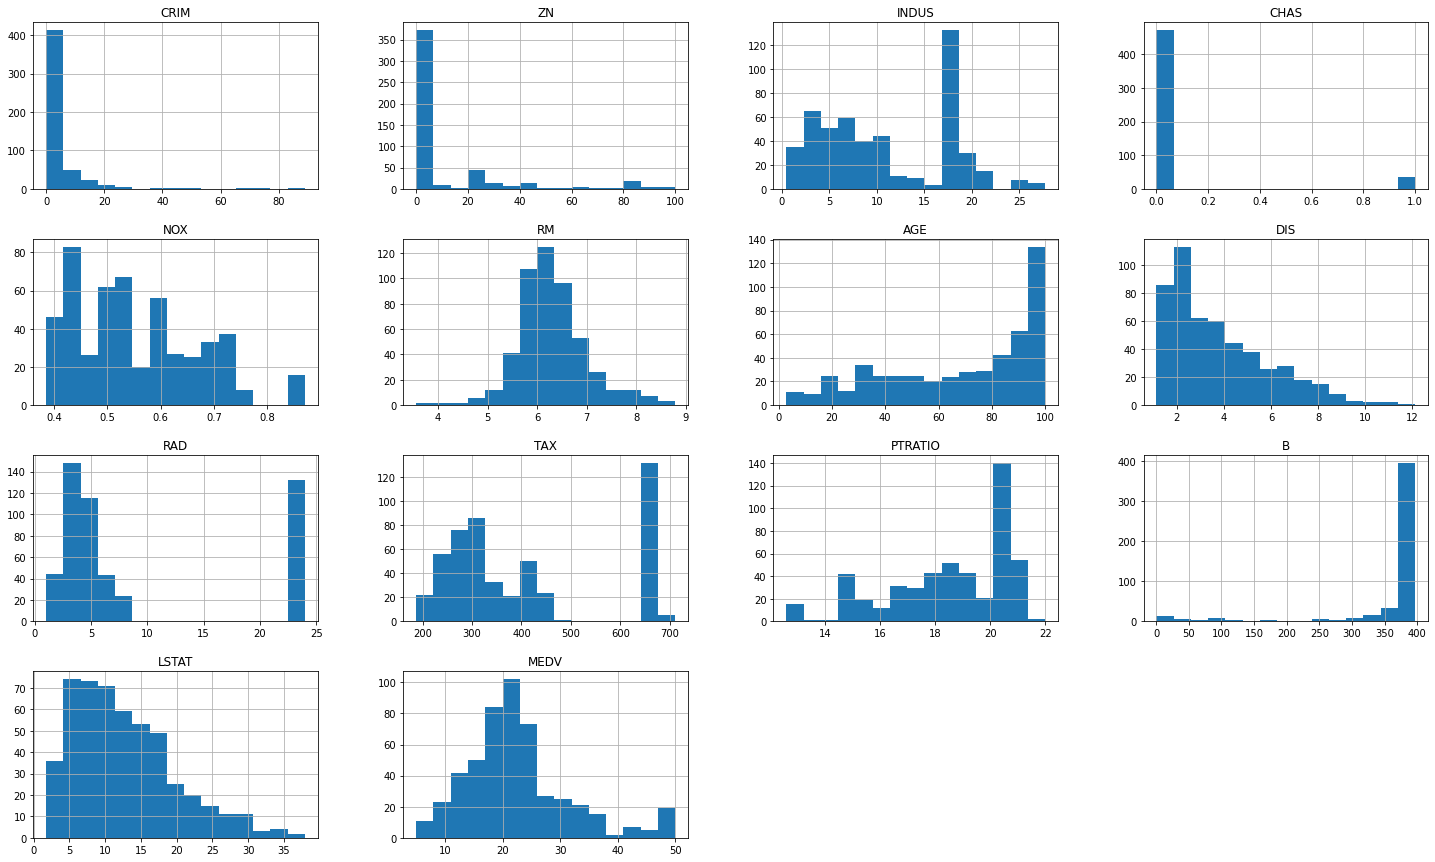

In [13]:
boston_data.hist(bins=15, figsize=(25,15))# plot histograms for all variables in the dataset
plt.show()

### Task 3

Already at this stage you should think about the meaning of the variables and if they may be a defining factor for the house price. 

Choose 2-3 variables with the most intuitive connection to the target variable. Note in which direction you expect these variables to affect the target (e.g. LSTAT most probably has a negative effect on the house price, because the house prices intuitively should be lower in the districts with high percentage of low income population). 

To check your hypothesis, visualise the relation between dependent and independent variables using scatter plots and answer the following questions:  

- Does it look like your hypothesis was correct?
- What can you conclude about the relation between y and x? 
- Is the dependency linear (points concentrated around the straight line)? 
- Is there a strong dependency or rather weak (if the points form a clear pattern there is a strong dependency, if they are evenly distributed, the dependency is not that strong)
- Which of the variables you checked could be the best candidate for the future model and why?

**Hint:** use ```plt.scatter()``` function for plotting. 

#### Example
The example below illustrates the logic of analysing variable LSTAT (% lower status of the population). Try to reproduce the same analysis for any other 2-3 variables available in this dataset. 

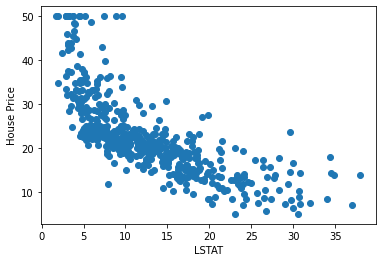

In [15]:
# define dependent and independent variables
y = boston_data['MEDV'].values
x1 = boston_data[['LSTAT']].values

# Create a scatter plot to check your hypothesis
plt.scatter(x1, y)
plt.xlabel('LSTAT')
plt.ylabel('House Price')
plt.show()

From the graph above we can see that LSTAT is negatively correlated with House Prices. We can confirm our original hypothesis. To model this kind of relation we could use either a linear function (fit a straight line to the data points), however we can see a slight illinearity as house prices are more sensitive for low values of LSTAT (left part of the graph with LSTAT less than 7 or 8). I expect this to be a strong variable, because we can see a clear pattern on the graph - the data points are concentrated around one line and it is easy to see the pattern. 

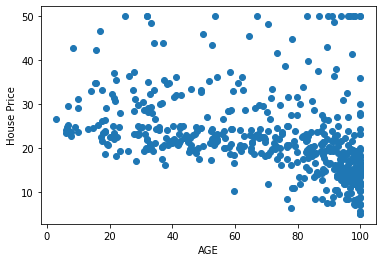

In [38]:
x2 = boston_data['AGE'].values
plt.scatter(x2,y)
plt.xlabel('AGE')
plt.ylabel('House Price')
plt.show()
# please write the code for your analysis here

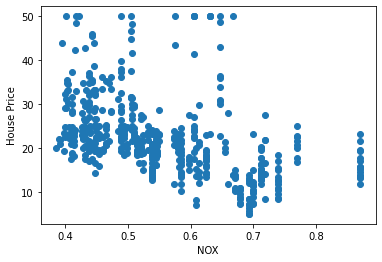

In [37]:
x2 = boston_data['NOX'].values # nitric oxides concentration (parts per 10 million)
plt.scatter(x2,y)
plt.xlabel('NOX')
plt.ylabel('House Price')
plt.show()

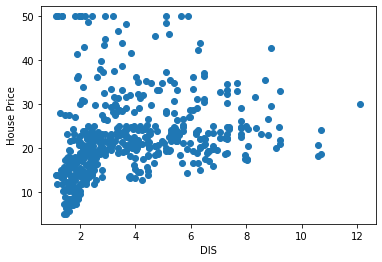

In [36]:
x3 = boston_data['DIS'].values # weighted distances to ﬁve Boston employment centers
plt.scatter(x3,y)
plt.xlabel('DIS')
plt.ylabel('House Price')
plt.show()

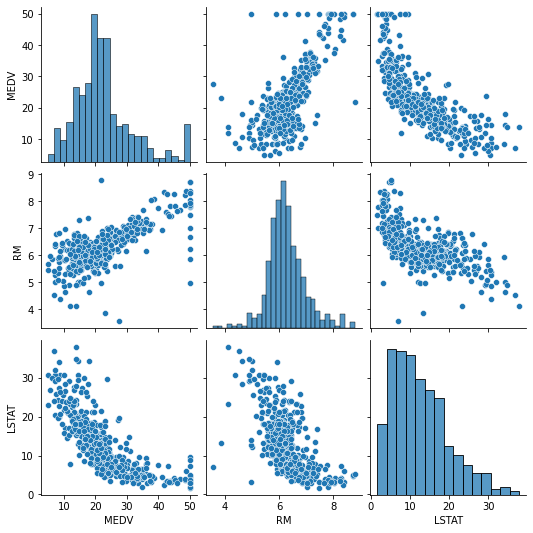

In [54]:
import seaborn as sns
sns.pairplot(boston_data[['MEDV', 'RM', 'LSTAT']])  # [['MEDV', 'AGE', 'LSTAT', 'DIS', 'INDUS']]

### Task 3
Build a linear regression model regressing y on a chosen x. 

In [45]:
# define dependent and independent variables
y = boston_data['MEDV'] #your code here
X = boston_data[['RM']] #your code here

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (506, 1) 
 y_shape: (506,)


In [46]:
reg = LinearRegression()
reg.fit(X, y)# initiate and fit the model with X

LinearRegression()

In [47]:
# predict the house prices for the dataset
y_pred = reg.predict(X) #your code here

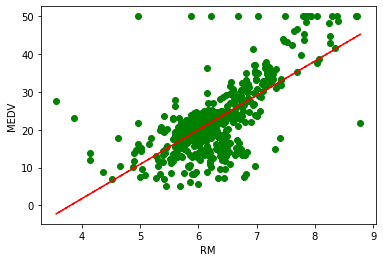

In [55]:
plt.scatter(X, y, c='green')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.plot(X, y_pred, linestyle='--', c='red')
plt.show()

R^2 is one of the main metrics used to estimate the goodness of the fit for linear regression models. General principle: the higher the number is, the better is supposed to be the model. You can try to build different models making a different choice of independent variable and then compare the numbers. Which model looks to be the best?

In [51]:
# calculate R2 for train and test datasets
r2 = r2_score(y, y_pred)

print('R squared of Linear Regression :', r2)

R squared of Linear Regression : 0.48352545599133423
